In [1]:
import bnlearn as bn

In [4]:
df = bn.import_example()
df.head()

,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


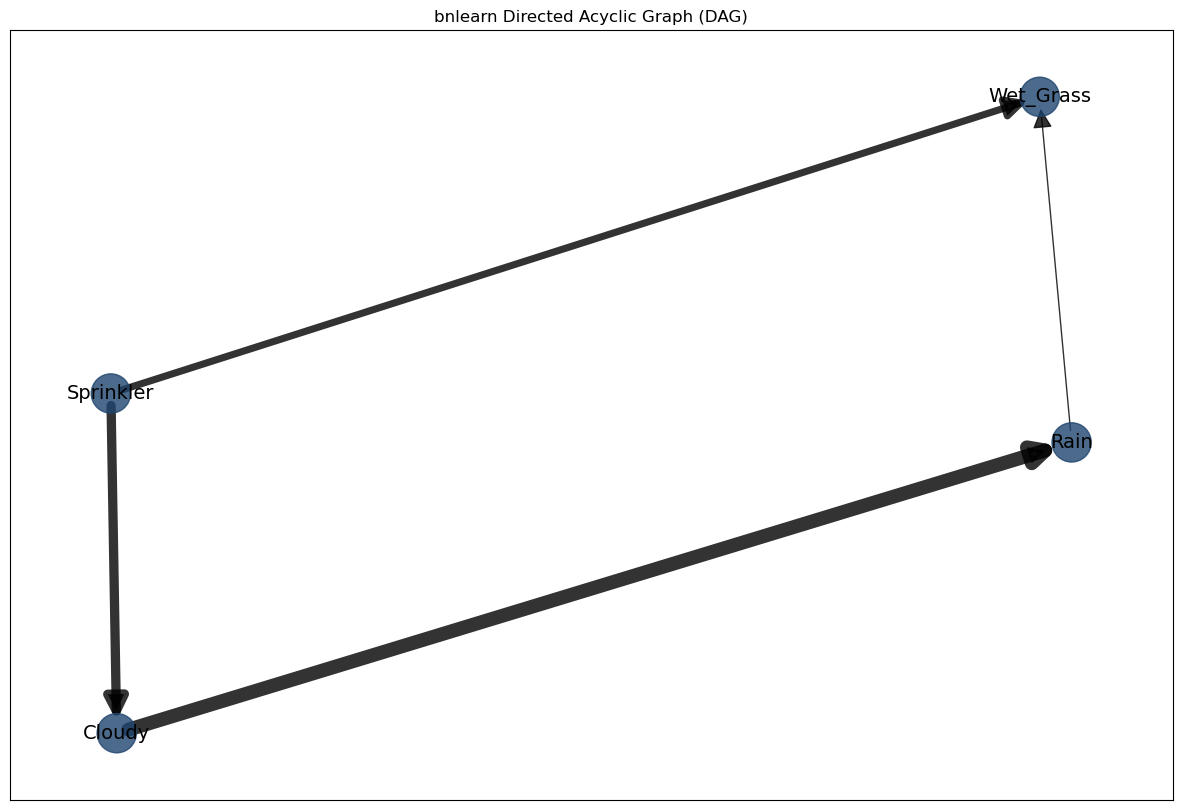

In [6]:
model = bn.structure_learning.fit(df)

model = bn.independence_test(model, df)

G = bn.plot(model)

### Titanic dataset

In [7]:
import pandas as pd

In [19]:
titanic = bn.import_example(data='titanic')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
dfhot, dfnum = bn.df2onehot(titanic)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 12/12 [00:00<00:00, 200.53it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 12/12 [00:00<00:00, 293.26it/s]

[df2onehot] >Total onehot features: 19


In [24]:
dfnum

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,108,1,2,1,523,146,3
1,1,1,190,0,2,1,596,81,1
2,1,3,353,0,1,1,669,146,3
3,1,1,272,0,2,1,49,55,3
4,0,3,15,1,1,1,472,146,3
...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,1,1,101,146,3
887,1,1,303,0,1,1,14,30,3
888,0,3,413,0,2,3,675,146,3
889,1,1,81,1,1,1,8,60,1


[bnlearn] >Filter variables (nodes) on black_list..
[bnlearn] >Number of features after white/black listing: 6
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


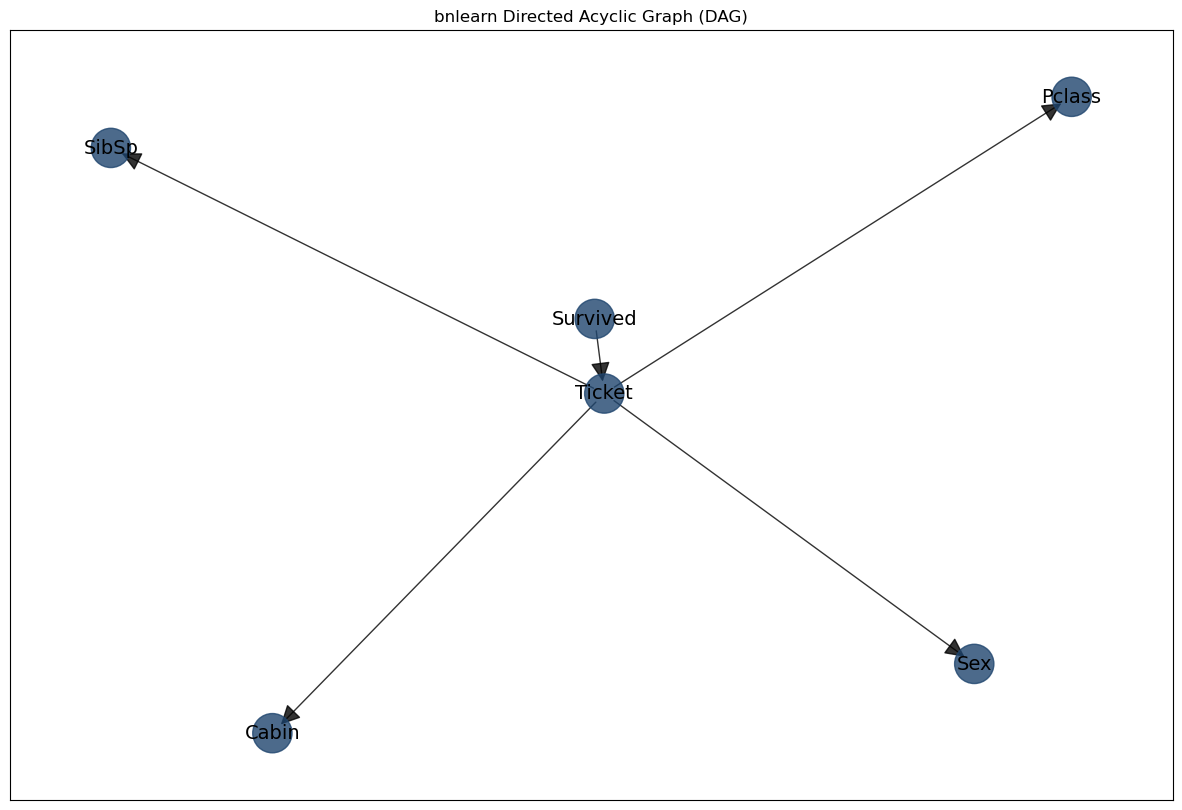

In [27]:
# Structure learning
model = bn.structure_learning.fit(dfnum, methodtype='cl', black_list=['Embarked','Parch','Name'], root_node='Survived', bw_list_method='nodes')
# model = bn.structure_learning.fit(dfnum)
# Plot
G = bn.plot(model, interactive=False)